In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


In [2]:

data = pd.read_csv('file_liniar.csv')

In [3]:
data.head()

,date,_Positive
0,2009-04-06,1304
1,2009-04-07,6886
2,2009-04-17,1312
3,2009-04-18,8686
4,2009-04-19,11090


In [4]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.rename(columns={'_Positive': 'y'})
data = data.asfreq('D')
data = data.sort_index()

data.head()


,y
date,
2009-04-06,1304.0
2009-04-07,6886.0
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN


In [5]:
data = data.interpolate(method='linear') 
data.head()

,y
date,
2009-04-06,1304.0
2009-04-07,6886.0
2009-04-08,6328.6
2009-04-09,5771.2
2009-04-10,5213.8


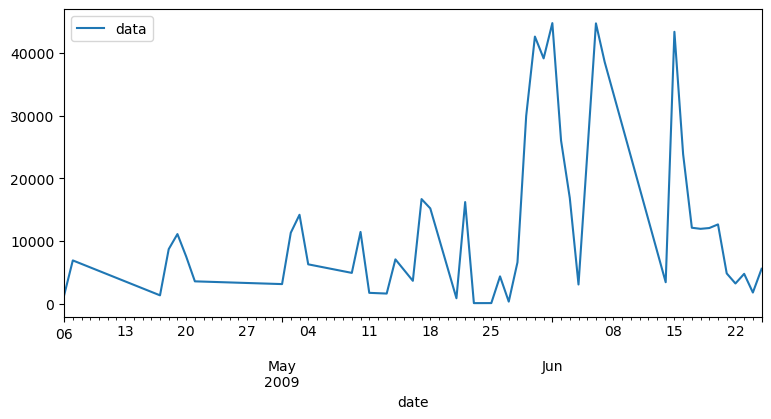

In [6]:
fig, ax=plt.subplots(figsize=(9, 4))
data['y'].plot(ax=ax, label='data')
ax.legend();

In [7]:
from sklearn.preprocessing import StandardScaler
# Create Object StandardScaler
scaler = StandardScaler()

# Apply normalization to time series data
data_normalized = scaler.fit_transform(data)

# Convert the result back to в DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)
data_normalized.head()

,y
date,
2009-04-06,-0.797402
2009-04-07,-0.314869
2009-04-08,-0.363053
2009-04-09,-0.411237
2009-04-10,-0.459421


/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


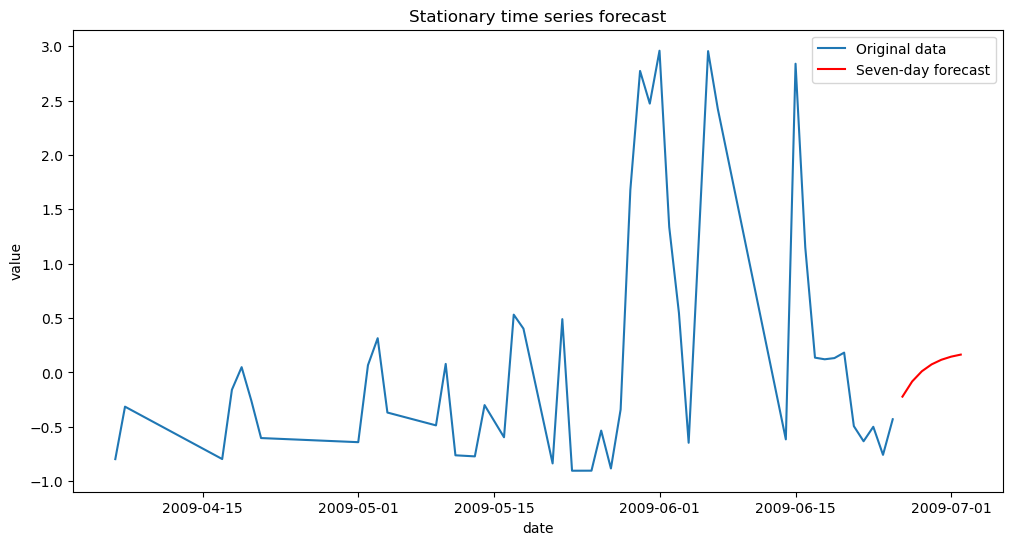

In [8]:
import statsmodels.api as sm
# determine the parameters ARIMA (p, d, q)
p, d, q = 1, 1, 1

# Create Model ARIMA
model = sm.tsa.ARIMA(data_normalized, order=(p, d, q))
results = model.fit()

# Prediction for the future (7 days)
forecast_7_days = results.forecast(steps=7)

# Generation of dates for the forecast period
last_date = data_normalized.index[-1]
forecast_dates_7 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Diagram of comparison of forecast and real data
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized, label='Original data')
plt.plot(forecast_dates_7, forecast_7_days, label='Seven-day forecast', color='red')
plt.legend()
plt.title('Stationary time series forecast')
plt.xlabel('date')
plt.ylabel('value')
plt.show()

In [9]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# ARIMA parameter options for analysis
p_values = range(0, 3)  # Example: values from 0 to 2 (inclusive) for p
d_values = range(0, 3)  # Example: values from 0 to 2 (inclusive) for d
q_values = range(0, 3)  # Example: values from 0 to 2 (inclusive) for q

# ACF and PACF analysis for different parameter combinations
for p in p_values:
    for d in d_values:
        for q in q_values:
            model = sm.tsa.ARIMA(data_normalized, order=(p, d, q))
            try:
                results = model.fit()
                print(f'ARIMA({p}, {d}, {q}) - AIC: {results.aic}')
            except:
                continue


ARIMA(0, 0, 0) - AIC: 233.8680423849761
ARIMA(0, 0, 1) - AIC: 193.30360960000667
ARIMA(0, 0, 2) - AIC: 182.49205770314373
ARIMA(0, 1, 0) - AIC: 181.51342431182618
ARIMA(0, 1, 1) - AIC: 182.9508054458241
ARIMA(0, 1, 2) - AIC: 177.94508976075198
ARIMA(0, 2, 0) - AIC: 239.78317045165988
ARIMA(0, 2, 1) - AIC: 186.64249397229193
ARIMA(0, 2, 2) - AIC: 188.2893623012735
ARIMA(1, 0, 0) - AIC: 175.95065956199267
ARIMA(1, 0, 1) - AIC: 177.37595869132883
ARIMA(1, 0, 2) - AIC: 179.32221456738827
ARIMA(1, 1, 0) - AIC: 183.16612946453694
ARIMA(1, 1, 1) - AIC: 176.00247814736053
ARIMA(1, 1, 2) - AIC: 176.80708996669017
ARIMA(1, 2, 0) - AIC: 224.24522253812788
ARIMA(1, 2, 1) - AIC: 188.4147707464109
ARIMA(1, 2, 2) - AIC: 189.92873160300564


/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starti

ARIMA(2, 0, 0) - AIC: 177.42672959026214
ARIMA(2, 0, 1) - AIC: 179.38194495635025
ARIMA(2, 0, 2) - AIC: 181.32813910223138
ARIMA(2, 1, 0) - AIC: 182.6651265923077
ARIMA(2, 1, 1) - AIC: 176.5573928699685
ARIMA(2, 1, 2) - AIC: 177.04951182575837
ARIMA(2, 2, 0) - AIC: 217.2937382505386


/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive

ARIMA(2, 2, 1) - AIC: 188.25408526192066
ARIMA(2, 2, 2) - AIC: 183.928578146427


/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


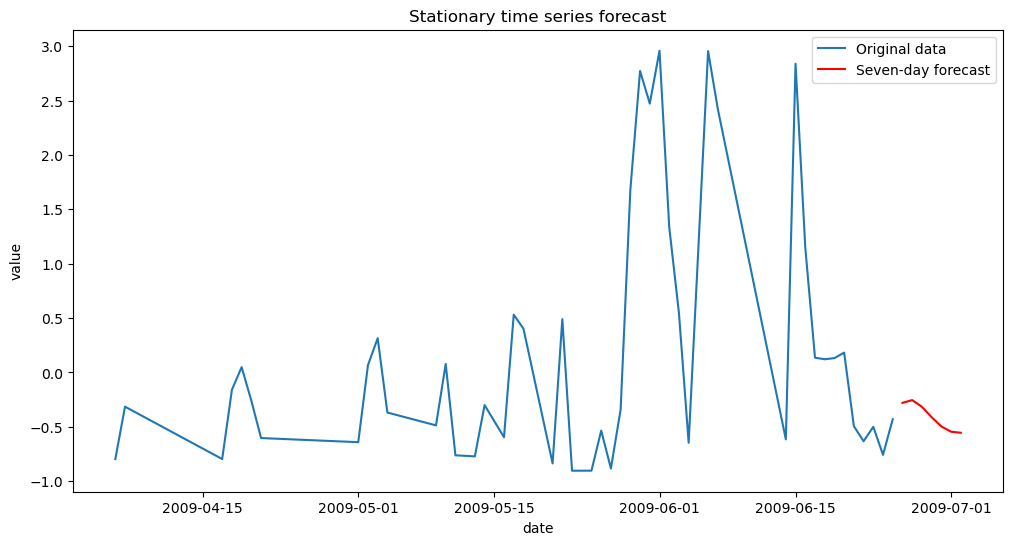

In [10]:
import statsmodels.api as sm

p, d, q = 2, 1, 2


model = sm.tsa.ARIMA(data_normalized, order=(p, d, q))
results = model.fit()

forecast_7_days = results.forecast(steps=7)

last_date = data_normalized.index[-1]
forecast_dates_7 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)


# Diagram of comparison of forecast and real data
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized, label='Original data')
plt.plot(forecast_dates_7, forecast_7_days, label='Seven-day forecast', color='red')
plt.legend()
plt.title('Stationary time series forecast')
plt.xlabel('date')
plt.ylabel('value')
plt.show()

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


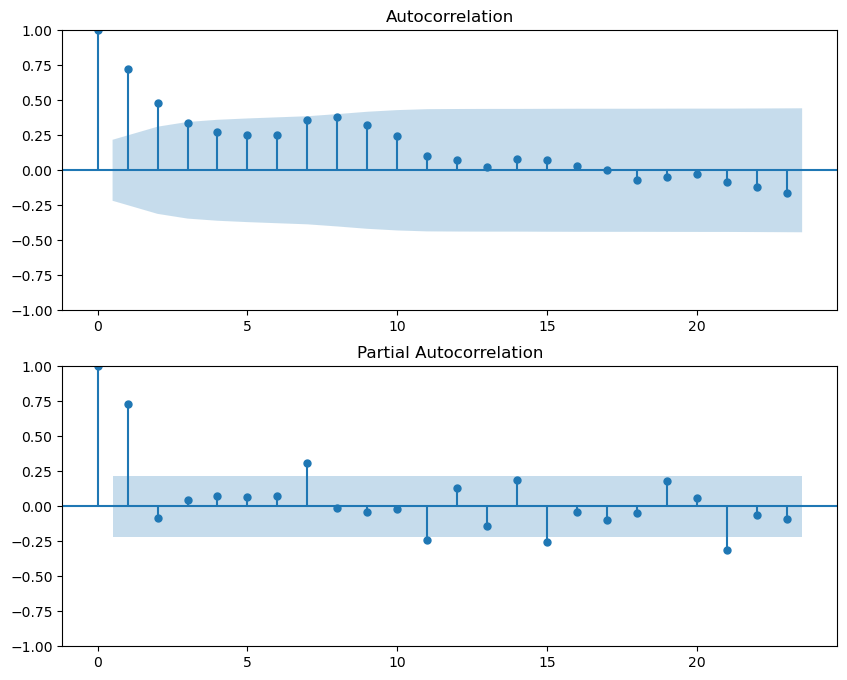

In [11]:
# Построение графиков ACF и PACF для оптимальных значений параметров (p, d, q)
optimal_p, optimal_d, optimal_q = 2, 1, 2  # Здесь используются значения из выбранной модели

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_normalized, lags=23, ax=axes[0])
plot_pacf(data_normalized, lags=23, ax=axes[1])

plt.show()

## Prediction for the future (30 days)

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


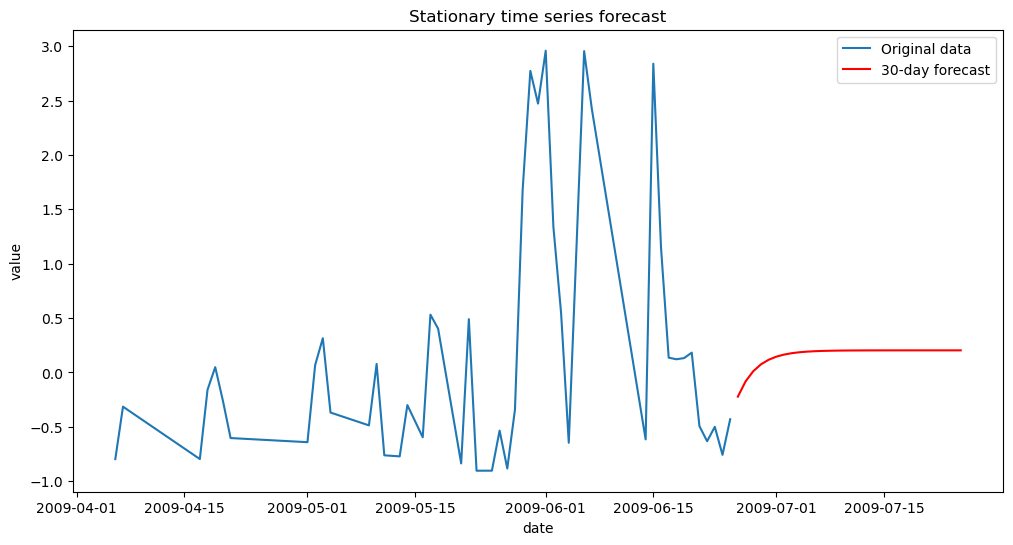

In [12]:

p, d, q = 1, 1, 1


model = sm.tsa.ARIMA(data_normalized, order=(p, d, q))
results = model.fit()

# Prediction for the future (30 days)
forecast_30_days = results.forecast(steps=30)


last_date = data_normalized.index[-1]
forecast_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Diagram of comparison of forecast and real data
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized, label='Original data')
plt.plot(forecast_dates_30, forecast_30_days, label='30-day forecast', color='red')
plt.legend()
plt.title('Stationary time series forecast')
plt.xlabel('date')
plt.ylabel('value')
plt.show()

# Prediction for the future (30 days)

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


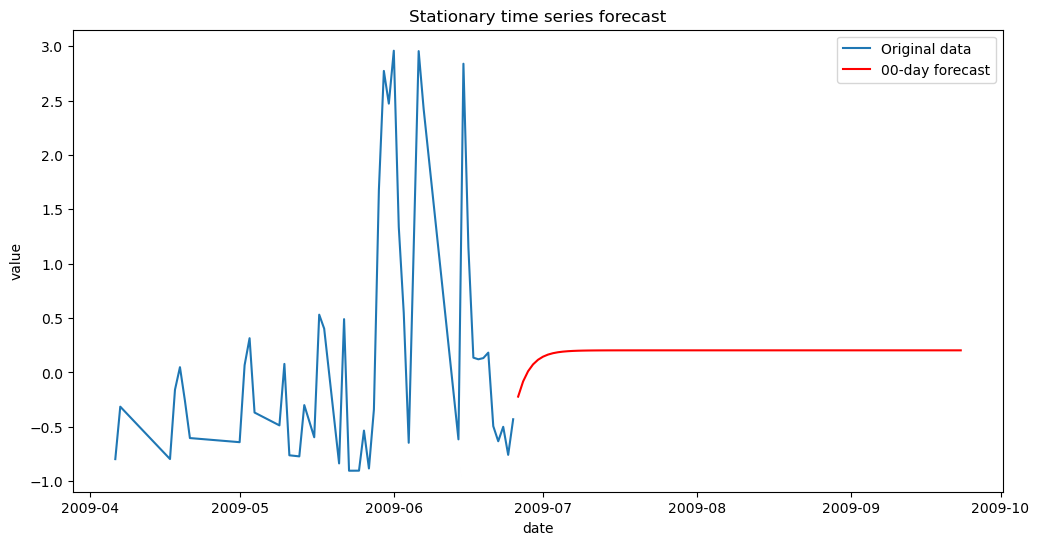

In [13]:

p, d, q = 1, 1, 1


model = sm.tsa.ARIMA(data_normalized, order=(p, d, q))
results = model.fit()

# Prediction for the future (30 days)
forecast_90_days = results.forecast(steps=90)

#
last_date = data_normalized.index[-1]
forecast_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

# Diagram of comparison of forecast and real data
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized, label='Original data')
plt.plot(forecast_dates_90, forecast_90_days, label='00-day forecast', color='red')
plt.legend()
plt.title('Stationary time series forecast')
plt.xlabel('date')
plt.ylabel('value')
plt.show()